## Notes from the book :

In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Searching the Text

Running some simple text searching techniques from the chapter.

* As we can see below, each text in nltk.book is from the Text class built into the nltk library

In [2]:
print(text1)
print('----')
type(text1)

<Text: Moby Dick by Herman Melville 1851>
----


nltk.text.Text

In [3]:
print(text6)
print('-----')
text6.concordance("taunt")

<Text: Monty Python and the Holy Grail>
-----
Displaying 2 of 2 matches:
 GUARD : No , now go away or I shall taunt you a second time - a ! [ sniff ] AR
change your armor . GALAHAD : Let us taunt it ! It may become so cross that it 


* We can extract word tokens similar to our search term using the similar() method. Here, I'm matching the word "love".

In [4]:
print(text2)
print('-----')
text2.similar("love")

<Text: Sense and Sensibility by Jane Austen 1811>
-----
affection sister heart mother time see town life it dear elinor
marianne me word family her him do regard head


In [5]:
print(text7)
print('-----')
text7.common_contexts(["stock","exchange"])

<Text: Wall Street Journal>
-----
the_is the_, the_of the_to


In [6]:
text7.dispersion_plot(["stock","market","exchange","rise","fall"])

<Figure size 640x480 with 1 Axes>

* ** Note : nltk.text.Text.generate() method has been removed from the library by the nltk developer team **

In [7]:
print(text6)
print('------')
print(len(text6))
print('------')

# Printing first 100 terms of a sorted set of text6

print(list(sorted(set(text6))[:100]))

<Text: Monty Python and the Holy Grail>
------
16967
------
['!', '!)', '!,', '!]', '#', "'", "'!", "',", "'.", "'...", "'?", '(', ',', ",'", ',--', '-', '--', '--...', '.', ".'", '.)', '..', '...', '...?', '...]', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '?!', 'A', 'ALL', 'AMAZING', 'ANIMATOR', 'ARMY', 'ARTHUR', 'Aaaaaaaaah', 'Aaaaaaaah', 'Aaaaaah', 'Aaaah', 'Aaaaugh', 'Aaagh', 'Aaah', 'Aaauggh', 'Aaaugh', 'Aaauugh', 'Aagh', 'Aah', 'Aauuggghhh', 'Aauuugh', 'Aauuuuugh', 'Aauuuves', 'Action', 'Actually', 'African', 'Ages', 'Aggh', 'Agh', 'Ah', 'Ahh', 'Alice', 'All', 'Allo', 'Almighty', 'Alright', 'Am', 'Amen', 'An', 'Anarcho', 'And', 'Angnor', 'Anthrax', 'Antioch', 'Anybody', 'Anyway', 'Apples', 'Aramaic']


* We obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with A. All capitalized words precede lowercase words.

* Below we can see that even though there are 16967 tokens in the text, there are only 2166 types or unique words.

In [8]:
print(len(set(text6)))

2166


* Let us try to compute the measure of lexical richness aka the token to type ratio

In [9]:
token_type_ratio = len(text6)/len(set(text6))

print("Token to Type Ratio is",token_type_ratio)


Token to Type Ratio is 7.833333333333333


* We can compute how often a word occurs in any given text with the count() method

In [10]:
# Checking how often 'lol' occurs in the chat corpus

print(text5)
print('-----')
print(text5.count("lol"))
print('-----')

percent = 100*(text5.count("lol")/len(text5))

print("The word \'lol\' constitutes %s percent of the chat corpus" %str(percent))

<Text: Chat Corpus>
-----
704
-----
The word 'lol' constitutes 1.5640968673628082 percent of the chat corpus


* Here I have written simple function to measure Token to Type Ratio(lexical_diversity()) and Count Percentage(percentage())

In [11]:
def lexical_diversity(text):
    ratio = str(len(text)/len(set(text)))
    return "The lexical diversity in {} is {}".format(text,ratio)

lexical_diversity(text9)

'The lexical diversity in <Text: The Man Who Was Thursday by G . K . Chesterton 1908> is 10.167915381225209'

In [12]:
def percentage(word,text):
    percent = str(100*(text.count(word)/len(text)))
    return "The word {} constitutes {} percent of {}".format(word,percent,text)

# Example test case 1:

print(percentage("love",text2))
print('-----')

# Example test case 2:
print(percentage("madness",text1))
print('-----')

# Example test case 3:
print(percentage("God",text3))


The word love constitutes 0.054387749336045656 percent of <Text: Sense and Sensibility by Jane Austen 1811>
-----
The word madness constitutes 0.006134522408260134 percent of <Text: Moby Dick by Herman Melville 1851>
-----
The word God constitutes 0.5160396747386293 percent of <Text: The Book of Genesis>


* We can use our lexical_diversity() function on lists as well, because in principle, it will only find the ratio of all occurances to unique occurances.

In [13]:
# Here I am taking two example sentences to see how it works. 

sent1 = "It was the best of times".split()
sent2 = "It was the worst of times".split()

print(sent1)
print('-----')
print(sent2)
print('-----')
print(lexical_diversity(sent1))
print('-----')
print(lexical_diversity(sent2))

['It', 'was', 'the', 'best', 'of', 'times']
-----
['It', 'was', 'the', 'worst', 'of', 'times']
-----
The lexical diversity in ['It', 'was', 'the', 'best', 'of', 'times'] is 1.0
-----
The lexical diversity in ['It', 'was', 'the', 'worst', 'of', 'times'] is 1.0


In [14]:
# Now let us add these two sentences into one and see the resulting expression's lexical diversity

sent = sent1+sent2
print(lexical_diversity(sent))

The lexical diversity in ['It', 'was', 'the', 'best', 'of', 'times', 'It', 'was', 'the', 'worst', 'of', 'times'] is 1.7142857142857142


### Simple Statistics in Text

Extracting statistically significant data from the text as demonstrated in the chapter.

In [15]:
# Using the FreqDist method to find the 50 most frequent words in the Inaugural Address Corpus

top50_text4 = FreqDist(text4).most_common(50)
print(top50_text4)

[('the', 9281), ('of', 6970), (',', 6840), ('and', 4991), ('.', 4676), ('to', 4311), ('in', 2527), ('a', 2134), ('our', 1905), ('that', 1688), ('be', 1460), ('is', 1403), ('we', 1141), ('for', 1075), ('by', 1036), ('it', 1011), ('which', 1002), ('have', 994), ('not', 916), ('as', 888), ('with', 886), ('will', 846), ('I', 831), ('are', 774), ('all', 758), ('their', 719), ('this', 700), ('The', 619), ('has', 611), ('people', 559), ('its', 554), (';', 544), ('or', 537), ('from', 521), ('on', 496), ('We', 483), ('been', 482), ('but', 479), ('can', 457), ('us', 455), ('my', 449), ('no', 406), ('an', 377), ('--', 363), ('upon', 363), ('who', 356), ('It', 356), ('so', 354), ('must', 345), ('they', 341)]


* As we can see in the above output, the FreqDist method outputs a list of tuples wherein each tuple contains the word in index 0 and its frequency in index 1. We can extract just the words from this.

In [16]:
mostcommonwords_text4 = [tuple[0] for tuple in top50_text4[:]]
print(mostcommonwords_text4)

['the', 'of', ',', 'and', '.', 'to', 'in', 'a', 'our', 'that', 'be', 'is', 'we', 'for', 'by', 'it', 'which', 'have', 'not', 'as', 'with', 'will', 'I', 'are', 'all', 'their', 'this', 'The', 'has', 'people', 'its', ';', 'or', 'from', 'on', 'We', 'been', 'but', 'can', 'us', 'my', 'no', 'an', '--', 'upon', 'who', 'It', 'so', 'must', 'they']


* In the above output we can observe that a lot of punctuation marks are part of the list of most common words. We can print all the punctuation marks from the list.

In [17]:
import re
char_pattern = re.compile('[^Aa-zZ|0123456789]')

# This will identify all the special characters from the most common words list

for i in mostcommonwords_text4:
    if char_pattern.search(i.lower()):
        print(i)

,
.
;
--


In [18]:
# This will remove all the special characters from the list

for i in mostcommonwords_text4:
    if char_pattern.search(i.lower()):
        mostcommonwords_text4.remove(i)
        
print(mostcommonwords_text4)
print('-----')
print(len(mostcommonwords_text4))

['the', 'of', 'and', 'to', 'in', 'a', 'our', 'that', 'be', 'is', 'we', 'for', 'by', 'it', 'which', 'have', 'not', 'as', 'with', 'will', 'I', 'are', 'all', 'their', 'this', 'The', 'has', 'people', 'its', 'or', 'from', 'on', 'We', 'been', 'but', 'can', 'us', 'my', 'no', 'an', 'upon', 'who', 'It', 'so', 'must', 'they']
-----
46


* We can check the frequency of each word in the top50 as following.

In [19]:
fdist_text4 = FreqDist(text4)

# Returns the frequency of the word 'people' in text4

fdist_text4['people']

559

* Generating a cumulative frequency graph to see the distribution of the words in text4.

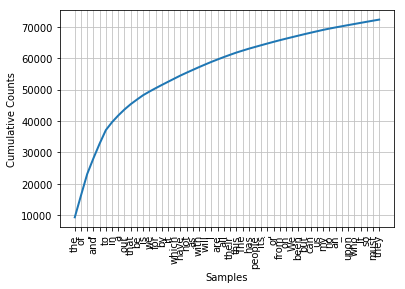

In [20]:
fdist_text4.plot(50,cumulative=True)

* Words that appear only once in a body of text are called **hapaxes**. We can also locate them using the hapaxes() method.

In [21]:
hapaxes = fdist_text4.hapaxes()

# Printing a small sample

print(hapaxes[:50])

['notification', '14th', 'fondest', 'predilection', 'flattering', 'asylum', 'interruptions', 'awaken', 'distrustful', 'despondence', 'inheriting', 'endowments', 'unpracticed', 'aver', 'thence', 'consulted', 'disinclination', 'untried', 'cares', 'palliated', 'mislead', 'repaired', 'improper', 'omit', 'tendering', 'homage', 'adore', 'Invisible', 'conducts', 'token', 'pious', 'reflections', 'auspiciously', 'acquit', 'designates', 'congenial', 'actuate', 'rectitude', 'adorn', 'behold', 'misdirect', 'preeminence', 'indissoluble', 'disregards', 'fifth', 'juncture', 'inquietude', 'discernment', 'characteristic', 'impregnably']


* We can check for the index of any given word using the index() method.

In [22]:
text4.index('president')

135994

* To get a word that is longer than 15 characters, we can use a simple list comprehension.

In [23]:
morethan15 = [word for word in text4 if len(word)>15]
print(sorted(morethan15))
print('-----')
print(len(morethan15))

['RESPONSIBILITIES', 'antiphilosophists', 'constitutionally', 'constitutionally', 'constitutionally', 'constitutionally', 'contradistinction', 'discountenancing', 'disqualification', 'enthusiastically', 'instrumentalities', 'instrumentalities', 'instrumentalities', 'instrumentalities', 'instrumentalities', 'instrumentalities', 'internationality', 'irresponsibility', 'irresponsibility', 'misappropriation', 'misrepresentation', 'misrepresentation', 'misunderstanding', 'misunderstanding', 'misunderstanding', 'misunderstanding', 'misunderstanding', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsibilities', 'responsi

* To get a word longer than 10 characters that appears more than 10 times in the text, we can use a simple list comprehension.

In [24]:
morethan10 = [word for word in text4 if len(word)>10 and fdist_text4[word]>10]
print(sorted(set(morethan10)))
print('-----')
print(len(set(morethan10)))

['Administration', 'Confederacy', 'Constitution', 'Legislature', 'Territories', 'accomplished', 'achievement', 'acknowledged', 'administration', 'advancement', 'agriculture', 'application', 'appointment', 'aspirations', 'authorities', 'circumstances', 'citizenship', 'civilization', 'combinations', 'communities', 'consciousness', 'consequences', 'consideration', 'constituted', 'constitutional', 'construction', 'continuance', 'contributed', 'controversies', 'cooperation', 'departments', 'destruction', 'determination', 'development', 'differences', 'difficulties', 'disposition', 'distinguished', 'encouragement', 'enforcement', 'enlightened', 'enterprises', 'established', 'establishment', 'expenditure', 'expenditures', 'extraordinary', 'forbearance', 'foundations', 'fulfillment', 'fundamental', 'generations', 'governments', 'improvement', 'independence', 'independent', 'individuals', 'inseparable', 'institution', 'institutions', 'intelligence', 'intelligent', 'intercourse', 'interference',

### Collocations and Bigrams

* A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds very odd.

* Bigrams are a contiguous sequence of two words. In an example like, "The cow jumped over the moon", the bigrams would be "the cow","cow jumped","jumped over","over the","the moon". 

In [25]:
text7.collocations()

million *U*; New York; billion *U*; Wall Street; program trading; Mrs.
Yeargin; vice president; Stock Exchange; Big Board; Georgia Gulf;
chief executive; Dow Jones; S&P 500; says *T*-1; York Stock; last
year; Sea Containers; South Korea; American Express; San Francisco


In [26]:
from nltk import bigrams
bigrams_sent = list(bigrams(sent))
print(*map(' '.join, bigrams_sent), sep=', ')

It was, was the, the best, best of, of times, times It, It was, was the, the worst, worst of, of times


* We can count the number of characters in each word of the text using list comprehensions.

In [27]:
fdist_text6 = FreqDist([len(word) for word in text6])

print(fdist_text6)
print('-----')
print(fdist_text6.keys())

<FreqDist with 13 samples and 16967 outcomes>
-----
dict_keys([5, 1, 4, 6, 7, 3, 2, 9, 8, 10, 11, 13, 12])


* Here we see that although there are 16967 tokens, there are only 13 distinct types based on word length.

In [28]:
fdist_text6.items()

dict_items([(5, 1450), (1, 5982), (4, 2298), (6, 1207), (7, 713), (3, 2375), (2, 2176), (9, 254), (8, 395), (10, 49), (11, 31), (13, 6), (12, 31)])

* Here we see the frequency distributions of the words based on word length.

In [29]:
fdist_text6.freq(7)

0.04202275004420345

* From the above output, the frequency of 7 letter words is ~ 0.042%

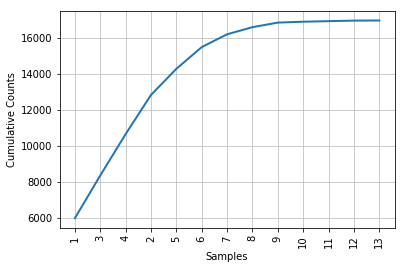

In [30]:
fdist_text6.plot(cumulative=True)

* Shown above is the cumulative frequency plot of text6 based on word length alone.

### Conditionals, Loops and other Native Python Ways

* Here I am using a simple list comprehension with a conditional inside it to extract all the words of the '-ing' form.

In [31]:
progressives = [word.lower() for word in text5 if word.endswith('ing')]

# Printing a small sample

print(progressives[:50])

['touching', 'changing', 'killing', 'missing', 'being', 'considering', 'changing', 'fucking', 'freaking', 'wedding', 'warning', 'ring', 'falling', 'freaking', 'having', 'anithing', 'annoying', 'playing', 'liking', 'kidding', 're-thinking', 'nothing', 'resisting', 'searching', 'darling', 'going', 'darling', 'incoming', 'fighting', 'cheaking', 'ignoring', 'fighting', 'nothing', 'going', 'intersting', 'looking', 'evening', 'going', 'meeting', 'trying', 'sing', 'nothing', 'kidding', 'thinking', 'getting', 'cheating', 'being', 'happening', 'passing', 'kidding']


* Using a conditional to pull out all words that are title cased.

In [32]:
titles = list(set([word for word in text4 if word.istitle()==True]))

# Printing a small sample

print(titles[:50])

['Page', 'Divine', 'Continue', 'Recall', 'Texas', 'Chosen', 'Stripped', 'Sanitary', 'Old', 'Already', 'From', 'Xpreparing', 'Cabinet', 'Immunity', 'Tarry', 'Islands', 'Misled', 'Miss', 'Intrusted', 'Freed', 'Abandonment', 'Problems', 'Off', 'In', 'Events', 'Returning', 'Presidency', 'Normandy', 'Over', 'Commission', 'Surely', 'Annihilate', 'Peoples', 'Societies', 'Underneath', 'Archibald', 'Johnson', 'Directly', 'Happiness', 'Senator', 'Muslims', 'Much', 'Information', 'Ohio', 'Father', 'Athens', 'Arlington', 'Valley', 'Strong', 'Ultimately']


* Similarly, to pull out words based on a matching pattern.

In [33]:
ght_terms = list(set([word.lower() for word in text6 if 'ght' in word]))
print(ght_terms)

['tonight', 'alight', 'flight', 'weight', 'might', 'mightiest', 'knights', 'almighty', 'fight', 'alright', 'daughter', 'thought', 'right', 'straight', 'frighten', 'slightly', 'sight', 'nightfall', 'riiight', 'flights', 'eight', 'night', 'fought', 'naughty', 'knight', 'brought']



* We can write nested code blocks with conditionals in them to extract salient data we need from the text.

In [34]:
import string

nums_in_text6 = []

for word in text6:
    if word.isalpha()==True:
        pass
    elif word in string.punctuation:
        pass
    elif char_pattern.search(word.lower()):
        pass
    else:
        nums_in_text6.append(word)
        
nums_in_text6 = list(set(nums_in_text6))

print(nums_in_text6)

['13', '16', '3', '1', '15', '6', '5', '20', '12', '7', '24', '9', '14', '10', '22', '4', '23', '19', '11', '17', '8', '18', '21', '2']


* In the above example, I have written a nested block with several conditionals in order to extract all the numbers embedded in the body of text6.

### Notes on Miscellaneous NLP Processes

* What tourist sites can I visit between Philadelphia and Pittsburgh on a limited budget? What do experts say about digital SLR cameras? What predictions about the steel market were made by credible commentators in the past week? Getting a computer to answer them automatically involves a range of language processing tasks, including information extraction, inference, and summari- zation, and would need to be carried out on a scale and with a level of robustness that is still beyond our current capabilities.

* ** Word Sense Disambiguation using Theta Roles and Case Marking** 

a. The lost children were found _by_ the searchers (agentive) 

b. The lost children were found _by_ the mountain (locative) 

c. The lost children were found _by_ the afternoon (temporal)


* ** Anaphora Resolution through Semantic Role Labelling**

a. The thieves stole the paintings. They were subsequently sold. 

b. The thieves stole the paintings. They were subsequently caught. 

c. The thieves stole the paintings. They were subsequently found.

Answering this question involves finding the antecedent of the pronoun they, either thieves or paintings. Computational techniques for tackling this problem include ana- phora resolution—identifying what a pronoun or noun phrase refers to—and semantic role labeling—identifying how a noun phrase relates to the verb (as agent, patient, instrument, and so on).

#### ** Note : babelize_shell() method has been dysfunctional for a few years now **

* Textual Entailment

Consider the following text-hypothesis pair:

a. Text: David Golinkin is the editor or author of 18 books, and over 150 responsa, articles, sermons and books

b. Hypothesis: Golinkin has written 18 books

In order to determine whether the hypothesis is supported by the text, the system needs the following background knowledge: 

(i) if someone is an author of a book, then he/ she has written that book; 

(ii) if someone is an editor of a book, then he/she has not written (all of) that book; 

(iii) if someone is editor or author of 18 books, then one cannot conclude that he/she is author of 18 books.

RTE is a shared public task that brought Textual Entailment into focus in the field of NLP but not very effectively so. More on this in Chapter 6.
